# Decision tree from Scratch


In this Python notebook, we will be implementing a decision tree algorithm from scratch, using the Gini index as a metric to find the best attribute for splitting the data. We will start by exploring the theory behind decision trees and their construction, and then we will proceed to implement the algorithm step by step.

To implement the decision tree algorithm, we will create two classes: Tree and Node. The Tree class will contain methods for training the model and making predictions, while the Node class will represent each node in the decision tree. We will use the Gini index as a metric to evaluate the quality of the split at each node, and choose the attribute that maximizes information gain.

We will use a simple dataset to demonstrate how the decision tree algorithm works and how to evaluate its performance. By the end of this notebook, you will have a better understanding of decision trees, how to implement them from scratch using Python, and how to use the Gini index as a metric for selecting the best attribute.






................................................................................

In [ ]:
# Importing necessary libraries
import numpy as np    # The numpy library provides support for large, multi-dimensional arrays and matrices
import pandas as pd   # The pandas library is used for data manipulation and analysis
import math           # The math library provides support for mathematical functions and constants

In [ ]:
data = pd.read_csv('/content/play_tennis (1).csv')
data

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [ ]:
data['outlook'] = data['outlook'].replace(['Sunny', 'Overcast', 'Rain'], [2,0,1])
data['temp'] = data['temp'].replace(['Hot', 'Mild', 'Cool'], [1,2,0])
data['humidity'] = data['humidity'].replace(['High', 'Normal'], [0,1])
data['wind'] = data['wind'].replace(['Weak', 'Strong'], [0,1])
data['play'] = data['play'].replace(['No', 'Yes'], [0, 1])
data.drop(['day'],axis=1,inplace=True)

In [ ]:
X = data.iloc[:,:-1].values
Y = data.iloc[:, -1].values.reshape(-1,1)

In [ ]:
feature_list = ['outlook', 'temp', 'humidity', 'wind']
target = 'play'

In [ ]:
class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        
        # for leaf node
        self.value = value

In [ ]:
class Tree:
    def __init__(self, min_samples_split=2, max_depth=3, mode="entropy"):
        # initialize the root of the tree 
        self.root = None
        self.mode = mode
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    def build_tree(self, dataset, curr_depth=0):
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["info_gain"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["info_gain"])
        
        # compute leaf node
        z = list(Y)
        leaf_value = max(z, key=z.count)
        # return leaf node
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        
        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf")
        
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y)
                    # update the best split if needed
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain                    
        # return best split
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def information_gain(self, parent, l_child, r_child):
        # function to compute information gain      
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if self.mode=="gini":
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain
    
    def entropy(self, y):
        # Entropy calci
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
    
    def gini_index(self, y):
        # gini index   
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini
    
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(feature_list[tree.feature_index]), "<=", tree.threshold, "?", tree.info_gain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
    
    def predict(self, X):    
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions
    
    def make_prediction(self, x, tree):
        # function to predict a single data point       
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)

In [ ]:
classifier = Tree(min_samples_split=3,max_depth=3, mode="gini")
classifier.fit(X,Y)
classifier.print_tree()

X_outlook <= 0 ? 0.10204081632653056
 left:1
 right:X_humidity <= 0 ? 0.18000000000000016
  left:X_outlook <= 1 ? 0.11999999999999983
    left:1
    right:0
  right:X_wind <= 0 ? 0.11999999999999983
    left:1
    right:0


In [ ]:
from sklearn import tree 
classifier = tree.DecisionTreeClassifier(criterion="entropy").fit(X, Y)

[Text(0.4, 0.9, 'outlook <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(0.3, 0.7, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5, 0.7, 'humidity <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(0.3, 0.5, 'outlook <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2, 0.3, 'wind <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7, 0.5, 'wind <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.6, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8, 0.3, 'temp <= 1.0\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.7, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.9, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]')]

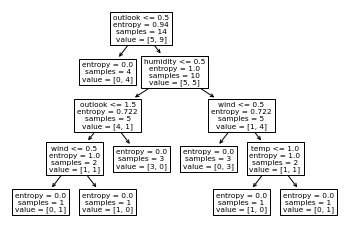

In [ ]:
tree.plot_tree(classifier, feature_names=feature_list)

In [ ]:
y_pred = classifier.predict(X)
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(Y, y_pred)
print(cm)
accuracy_score(Y, y_pred)

[[5 0]
 [0 9]]


1.0

**Sklearn**

In [ ]:
from sklearn.model_selection import train_test_split
x_train  , x_test, y_train, y_test =train_test_split(X ,Y , test_size=0.25, random_state=3)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = classifier.predict(x_test)
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1 1]
 [0 2]]


0.75